In [1]:
import pandas as pd
import numpy as np
from src.scripts import timeseries_anim
import json
from src.scripts.clinical_trials import (
    combine_trials_json,
    plot_clinical_counts,
    classify_disease,
    load_clinical_trials_data,
)

In [2]:
df = pd.read_csv(
    "../data/BindingDB_All.tsv",
    sep="\t",
    usecols=[
        "Ligand SMILES",
        "UniProt (SwissProt) Primary ID of Target Chain",
        "DrugBank ID of Ligand",
        "IC50 (nM)",
        "Article DOI",
        "Institution",
        "Patent Number",
        "ZINC ID of Ligand",
    ],
)

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_4267/2446788585.py:1: DtypeWarning: Columns (9,17,21,23,33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [3]:
# load initial data
uniprot_ids = [
    "P07949",
    "P14416",
]  # ["P03367", "P37238"]  # TODO: find RET and other interestig ones
targets = timeseries_anim.filter_RET(df, uniprot_ids=uniprot_ids)

In [4]:
uniprot_ids_names_mapping = {"P07949": "RET", "P14416": "D(2) dopamine receptor"}

In [5]:
targets = targets.drop_duplicates(subset=["Ligand SMILES"])

In [6]:
targets

Ligand SMILES IC50 (nM)  \
38708        CSc1ccccc1N1CCN(CCCCCC(=O)NC2CCCc3ccccc23)CC1       NaN   
38709        COc1ccccc1N1CCN(CCCCCC(=O)NC2CCCc3ccccc23)CC1       NaN   
38710         Cc1ccccc1N1CCN(CCCCCC(=O)NC2CCCc3ccccc23)CC1       NaN   
38711    CC(=O)c1ccccc1N1CCN(CCCCCC(=O)NC2CCCc3ccccc23)CC1       NaN   
38712         Oc1ccccc1N1CCN(CCCCCC(=O)NC2CCCc3ccccc23)CC1       NaN   
...                                                    ...       ...   
2914186  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...        11   
2914187  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...        12   
2914601          Cc1cc(nc(Nc2ccccc2-c2nnn[nH]2)n1)C(F)(F)F       NaN   
2916514  OCc1cc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(F...        30   
2916515  Nc1nccc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(...        30   

               Article DOI Patent Number                     Institution  \
38708    10.1021/jm070487n           NaN  Universita degli Studi di Bari   
38709    10.1021/jm070487n           NaN  Universita degli Studi di Bari   
38710    10.1021/jm070487n           NaN  Universita degli Studi di Bari   
38711    10.1021/jm070487n           NaN  Universita degli Studi di Bari   
38712    10.1021/jm070487n           NaN  Universita degli Studi di Bari   
...                    ...           ...                             ...   
2914186                NaN           NaN                             NaN   
2914187                NaN           NaN                             NaN   
2914601                NaN           NaN                             NaN   
2916514                NaN           NaN                             NaN   
2916515                NaN           NaN                             NaN   

        DrugBank ID of Ligand ZINC ID of Ligand  \
38708                     NaN      ZINC13586566   
38709                     NaN      ZINC13586534   
38710                     NaN      ZINC13586576   
38711                     NaN      ZINC13586546   
38712                     NaN      ZINC13586570   
...                       ...               ...   
2914186                   NaN               NaN   
2914187                   NaN               NaN   
2914601                   NaN               NaN   
2916514                   NaN               NaN   
2916515                   NaN               NaN   

        UniProt (SwissProt) Primary ID of Target Chain  
38708                                           P14416  
38709                                           P14416  
38710                                           P14416  
38711                                           P14416  
38712                                           P14416  
...                                                ...  
2914186                                         P07949  
2914187                                         P07949  
2914601                                         P14416  
2916514                                         P07949  
2916515                                         P07949  

[14929 rows x 8 columns]

In [7]:
targets

Ligand SMILES IC50 (nM)  \
38708        CSc1ccccc1N1CCN(CCCCCC(=O)NC2CCCc3ccccc23)CC1       NaN   
38709        COc1ccccc1N1CCN(CCCCCC(=O)NC2CCCc3ccccc23)CC1       NaN   
38710         Cc1ccccc1N1CCN(CCCCCC(=O)NC2CCCc3ccccc23)CC1       NaN   
38711    CC(=O)c1ccccc1N1CCN(CCCCCC(=O)NC2CCCc3ccccc23)CC1       NaN   
38712         Oc1ccccc1N1CCN(CCCCCC(=O)NC2CCCc3ccccc23)CC1       NaN   
...                                                    ...       ...   
2914186  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...        11   
2914187  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...        12   
2914601          Cc1cc(nc(Nc2ccccc2-c2nnn[nH]2)n1)C(F)(F)F       NaN   
2916514  OCc1cc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(F...        30   
2916515  Nc1nccc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(...        30   

               Article DOI Patent Number                     Institution  \
38708    10.1021/jm070487n           NaN  Universita degli Studi di Bari   
38709    10.1021/jm070487n           NaN  Universita degli Studi di Bari   
38710    10.1021/jm070487n           NaN  Universita degli Studi di Bari   
38711    10.1021/jm070487n           NaN  Universita degli Studi di Bari   
38712    10.1021/jm070487n           NaN  Universita degli Studi di Bari   
...                    ...           ...                             ...   
2914186                NaN           NaN                             NaN   
2914187                NaN           NaN                             NaN   
2914601                NaN           NaN                             NaN   
2916514                NaN           NaN                             NaN   
2916515                NaN           NaN                             NaN   

        DrugBank ID of Ligand ZINC ID of Ligand  \
38708                     NaN      ZINC13586566   
38709                     NaN      ZINC13586534   
38710                     NaN      ZINC13586576   
38711                     NaN      ZINC13586546   
38712                     NaN      ZINC13586570   
...                       ...               ...   
2914186                   NaN               NaN   
2914187                   NaN               NaN   
2914601                   NaN               NaN   
2916514                   NaN               NaN   
2916515                   NaN               NaN   

        UniProt (SwissProt) Primary ID of Target Chain  
38708                                           P14416  
38709                                           P14416  
38710                                           P14416  
38711                                           P14416  
38712                                           P14416  
...                                                ...  
2914186                                         P07949  
2914187                                         P07949  
2914601                                         P14416  
2916514                                         P07949  
2916515                                         P07949  

[14929 rows x 8 columns]

In [8]:
# citations
with open("../src/data/citations.json", "r") as f:
    citations = json.load(f)
citations = pd.DataFrame(citations)

# merge
targets = (
    pd.merge(
        left=targets,
        right=citations,
        left_on="Article DOI",
        right_on="doi",
        how="outer",
    )
    .dropna(subset="Ligand SMILES")
    .drop(columns="Article DOI")
)

In [9]:
targets

Ligand SMILES IC50 (nM)  \
1             Nc1ccccc1C(=O)NCCCCN1CCN(CC1)c1nsc2ccccc12       NaN   
2                                 NCCc1c[nH]c2ccc(O)cc12       NaN   
3                        [NH3+][C@@H]1CCc2cc(O)c(O)cc2C1       NaN   
4                                   NCC(O)c1ccc(O)c(O)c1       NaN   
5      CN1C[C@H](CSc2ccccn2)C[C@@H]2Cc3c(O)cccc3C[C@@...       NaN   
...                                                  ...       ...   
54806  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...        11   
54807  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...        12   
54808          Cc1cc(nc(Nc2ccccc2-c2nnn[nH]2)n1)C(F)(F)F       NaN   
54809  OCc1cc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(F...        30   
54810  Nc1nccc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(...        30   

      Patent Number            Institution DrugBank ID of Ligand  \
1               NaN  University of Toronto                   NaN   
2               NaN  University of Toronto                   NaN   
3               NaN  University of Toronto                   NaN   
4               NaN  University of Toronto                   NaN   
5               NaN  University of Toronto                   NaN   
...             ...                    ...                   ...   
54806           NaN                    NaN                   NaN   
54807           NaN                    NaN                   NaN   
54808           NaN                    NaN                   NaN   
54809           NaN                    NaN                   NaN   
54810           NaN                    NaN                   NaN   

      ZINC ID of Ligand UniProt (SwissProt) Primary ID of Target Chain  \
1          ZINC01537573                                         P14416   
2          ZINC00057058                                         P14416   
3          ZINC03872369                                         P14416   
4          ZINC00057624                                         P14416   
5          ZINC03826945                                         P14416   
...                 ...                                            ...   
54806               NaN                                         P07949   
54807               NaN                                         P07949   
54808               NaN                                         P14416   
54809               NaN                                         P07949   
54810               NaN                                         P07949   

                                       doi  citation  
1      10.1002/(SICI)1098-2396(199702)25:2       NaN  
2      10.1002/(SICI)1098-2396(199702)25:2       NaN  
3      10.1002/(SICI)1098-2396(199702)25:2       NaN  
4      10.1002/(SICI)1098-2396(199702)25:2       NaN  
5      10.1002/(SICI)1098-2396(199702)25:2       NaN  
...                                    ...       ...  
54806                                  NaN       NaN  
54807                                  NaN       NaN  
54808                                  NaN       NaN  
54809                                  NaN       NaN  
54810                                  NaN       NaN  

[14929 rows x 9 columns]

In [10]:
# patents
with open("../src/data/patents.json", "r") as f:
    patents = json.load(f)
patents_df = pd.DataFrame(
    [
        {
            "patent": patent["patent"],
            "patent_status": patent["info"].get("status", np.nan),
            "families citing": int(patent["info"].get("families citing", 0) or 0),
            "cited by": int(patent["info"].get("cited by", 0) or 0),
        }
        for patent in patents
        if isinstance(patent, dict) and isinstance(patent.get("info"), dict)
    ]
)
patents_df["patent_citations"] = patents_df["families citing"] + patents_df["cited by"]
patents_df.drop(columns=["families citing", "cited by"], inplace=True)

# merge
targets = (
    pd.merge(
        left=targets,
        right=patents_df,
        left_on="Patent Number",
        right_on="patent",
        how="outer",
    )
    .dropna(subset="Ligand SMILES")
    .drop(columns="Patent Number")
)

In [11]:
targets

Ligand SMILES IC50 (nM)  \
54     Cn1cc(cn1)-c1cc(-c2ccc(nc2)N2CCN(CC2)C(=O)OC(C...      35.8   
55     Cn1cc(cn1)-c1cc(-c2ccc(nc2)N2CCNCC2)c2c(cnn2c1...      19.6   
56     Cn1cc(cn1)-c1cc(-c2ccc(nc2)N2CCN(CC2)C(=O)CCS(...      11.9   
57     Cn1cc(cn1)-c1cc(-c2ccc(nc2)N2CCN(CC2)C(=O)[C@@...      3.10   
58     Cn1cc(cn1)-c1cc(-c2ccc(nc2)N2CCN(CC2)C(=O)Cc2c...      4.60   
...                                                  ...       ...   
22148  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...        11   
22149  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...        12   
22150          Cc1cc(nc(Nc2ccccc2-c2nnn[nH]2)n1)C(F)(F)F       NaN   
22151  OCc1cc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(F...        30   
22152  Nc1nccc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(...        30   

               Institution DrugBank ID of Ligand ZINC ID of Ligand  \
54     Array BioPharma Inc                   NaN               NaN   
55     Array BioPharma Inc                   NaN               NaN   
56     Array BioPharma Inc                   NaN               NaN   
57     Array BioPharma Inc                   NaN               NaN   
58     Array BioPharma Inc                   NaN               NaN   
...                    ...                   ...               ...   
22148                  NaN                   NaN               NaN   
22149                  NaN                   NaN               NaN   
22150                  NaN                   NaN               NaN   
22151                  NaN                   NaN               NaN   
22152                  NaN                   NaN               NaN   

      UniProt (SwissProt) Primary ID of Target Chain  doi  citation  \
54                                            P07949  NaN       NaN   
55                                            P07949  NaN       NaN   
56                                            P07949  NaN       NaN   
57                                            P07949  NaN       NaN   
58                                            P07949  NaN       NaN   
...                                              ...  ...       ...   
22148                                         P07949  NaN       NaN   
22149                                         P07949  NaN       NaN   
22150                                         P14416  NaN       NaN   
22151                                         P07949  NaN       NaN   
22152                                         P07949  NaN       NaN   

           patent patent_status  patent_citations  
54     US10023570        Active              76.0  
55     US10023570        Active              76.0  
56     US10023570        Active              76.0  
57     US10023570        Active              76.0  
58     US10023570        Active              76.0  
...           ...           ...               ...  
22148         NaN           NaN               NaN  
22149         NaN           NaN               NaN  
22150         NaN           NaN               NaN  
22151         NaN           NaN               NaN  
22152         NaN           NaN               NaN  

[14929 rows x 11 columns]

In [12]:
# TODO: clinical trials: check clinical_trials.ipynb and understand how to get the graphs
# count data into the current df (by merging on ZINC IDs, which are already in 'targets')
paths = [
    "../src/data/ZINC_references_trials_amel.json",
    "../src/data/ZINC_references_trials_daphne.json",
    "../src/data/ZINC_references_trials_wes.json",
    "../src/data/ZINC_references_trials_greg.json",
    "../src/data/ZINC_references_trials_guillaume.json",
]
df_all = combine_trials_json(paths)
df_all

ZINC ID of Ligand         code  \
0           ZINC03814434  NCT03114228   
1           ZINC03814434  NCT02624570   
2           ZINC03814434  NCT03258931   
3           ZINC03814434  NCT03207334   
4           ZINC03814434  NCT03092674   
...                  ...          ...   
340574      ZINC00056568  NCT00004871   
340575      ZINC00056568  NCT00002796   
340576      ZINC00056568  NCT00002909   
340577      ZINC00056568  NCT00001565   
340578      ZINC00056568  NCT00004767   

                                              description  \
0       An Expanded Treatment Protocol (ETP) of Midost...   
1       Midostaurin Access Program for Newly Diagnosed...   
2       Study of Crenolanib vs Midostaurin Following I...   
3       iCare4: Genomic Signatures With Midostaurin in...   
4       Azacitidine With or Without Nivolumab or Midos...   
...                                                   ...   
340574  Azacitidine Plus Phenylbutyrate in Treating Pa...   
340575  Phase I-II Study of Fluorouracil in Combinatio...   
340576  Phenylbutyrate in Treating Patients With Refra...   
340577  Phase I and Pharmacokinetic Trial of Phenylbut...   
340578  Phase II Study of Sodium Phenylbutyrate, Sodiu...   

                status_name       phase_name  start_date  
0       No longer available             None        None  
1                 Available             None        None  
2        Not yet recruiting          Phase 3  2018-05-01  
3        Not yet recruiting          Phase 2  2018-05-01  
4                Recruiting  Phase 2/Phase 3  2017-12-22  
...                     ...              ...         ...  
340574            Completed          Phase 1  2000-05-01  
340575           Terminated  Phase 1/Phase 2  1997-05-01  
340576            Completed          Phase 1  1997-02-01  
340577            Completed          Phase 1  1996-12-01  
340578            Completed          Phase 2  1985-01-01  

[340579 rows x 6 columns]

In [13]:
phase_4_count_df = (
    df_all.query("status_name == 'Completed'")
    .value_counts(["ZINC ID of Ligand", "phase_name"])
    .reset_index()
    .query("phase_name == 'Phase 4'")
    .rename(columns={"count": "phase_4_count"})
    .drop(columns="phase_name")
)

In [14]:
targets

Ligand SMILES IC50 (nM)  \
54     Cn1cc(cn1)-c1cc(-c2ccc(nc2)N2CCN(CC2)C(=O)OC(C...      35.8   
55     Cn1cc(cn1)-c1cc(-c2ccc(nc2)N2CCNCC2)c2c(cnn2c1...      19.6   
56     Cn1cc(cn1)-c1cc(-c2ccc(nc2)N2CCN(CC2)C(=O)CCS(...      11.9   
57     Cn1cc(cn1)-c1cc(-c2ccc(nc2)N2CCN(CC2)C(=O)[C@@...      3.10   
58     Cn1cc(cn1)-c1cc(-c2ccc(nc2)N2CCN(CC2)C(=O)Cc2c...      4.60   
...                                                  ...       ...   
22148  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...        11   
22149  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...        12   
22150          Cc1cc(nc(Nc2ccccc2-c2nnn[nH]2)n1)C(F)(F)F       NaN   
22151  OCc1cc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(F...        30   
22152  Nc1nccc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(...        30   

               Institution DrugBank ID of Ligand ZINC ID of Ligand  \
54     Array BioPharma Inc                   NaN               NaN   
55     Array BioPharma Inc                   NaN               NaN   
56     Array BioPharma Inc                   NaN               NaN   
57     Array BioPharma Inc                   NaN               NaN   
58     Array BioPharma Inc                   NaN               NaN   
...                    ...                   ...               ...   
22148                  NaN                   NaN               NaN   
22149                  NaN                   NaN               NaN   
22150                  NaN                   NaN               NaN   
22151                  NaN                   NaN               NaN   
22152                  NaN                   NaN               NaN   

      UniProt (SwissProt) Primary ID of Target Chain  doi  citation  \
54                                            P07949  NaN       NaN   
55                                            P07949  NaN       NaN   
56                                            P07949  NaN       NaN   
57                                            P07949  NaN       NaN   
58                                            P07949  NaN       NaN   
...                                              ...  ...       ...   
22148                                         P07949  NaN       NaN   
22149                                         P07949  NaN       NaN   
22150                                         P14416  NaN       NaN   
22151                                         P07949  NaN       NaN   
22152                                         P07949  NaN       NaN   

           patent patent_status  patent_citations  
54     US10023570        Active              76.0  
55     US10023570        Active              76.0  
56     US10023570        Active              76.0  
57     US10023570        Active              76.0  
58     US10023570        Active              76.0  
...           ...           ...               ...  
22148         NaN           NaN               NaN  
22149         NaN           NaN               NaN  
22150         NaN           NaN               NaN  
22151         NaN           NaN               NaN  
22152         NaN           NaN               NaN  

[14929 rows x 11 columns]

In [15]:
# merge
targets = pd.merge(
    left=targets,
    right=phase_4_count_df,
    left_on="ZINC ID of Ligand",
    right_on="ZINC ID of Ligand",
    how="outer",
).dropna(subset="Ligand SMILES")

In [16]:
targets

Ligand SMILES IC50 (nM)  \
2           COc1ccc2C[C@@H]3N(C)CCc4cc5OCOc5c(c34)-c2c1O       NaN   
4                      Cl.CN1CCN2C(C1)c1ccccc1Cc1ccccc21       NaN   
10                    CN1CCN2[C@H](C1)c1ccccc1Cc1ccccc21       NaN   
11                             CN[C@@H](C)Cc1ccc2OCOc2c1       NaN   
14                    Clc1ccc2Oc3ccccc3N=C(N3CCNCC3)c2c1       NaN   
...                                                  ...       ...   
15433  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...        11   
15434  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...        12   
15435          Cc1cc(nc(Nc2ccccc2-c2nnn[nH]2)n1)C(F)(F)F       NaN   
15436  OCc1cc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(F...        30   
15437  Nc1nccc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(...        30   

                                             Institution  \
2                           Neuroscience Research Centre   
4      Johnson & Johnson Pharmaceutical Research & De...   
10                     Oregon Health Sciences University   
11                                     SRI International   
14                                 University of Toronto   
...                                                  ...   
15433                                                NaN   
15434                                                NaN   
15435                                                NaN   
15436                                                NaN   
15437                                                NaN   

      DrugBank ID of Ligand ZINC ID of Ligand  \
2                       NaN      ZINC00000103   
4                       NaN      ZINC00000504   
10                      NaN      ZINC00000855   
11                      NaN      ZINC00000859   
14                  DB00543      ZINC00000931   
...                     ...               ...   
15433                   NaN               NaN   
15434                   NaN               NaN   
15435                   NaN               NaN   
15436                   NaN               NaN   
15437                   NaN               NaN   

      UniProt (SwissProt) Primary ID of Target Chain                      doi  \
2                                             P14416                      NaN   
4                                             P14416        10.1021/jm049632c   
10                                            P14416  10.1073/pnas.86.24.9762   
11                                            P14416                      NaN   
14                                            P14416    10.1038/sj.mp.4000336   
...                                              ...                      ...   
15433                                         P07949                      NaN   
15434                                         P07949                      NaN   
15435                                         P14416                      NaN   
15436                                         P07949                      NaN   
15437                                         P07949                      NaN   

       citation patent patent_status  patent_citations  phase_4_count  
2           NaN    NaN           NaN               NaN            NaN  
4          64.0    NaN           NaN               NaN           40.0  
10        316.0    NaN           NaN               NaN            NaN  
11          NaN    NaN           NaN               NaN            NaN  
14        215.0    NaN           NaN               NaN            NaN  
...         ...    ...           ...               ...            ...  
15433       NaN    NaN           NaN               NaN            NaN  
15434       NaN    NaN           NaN               NaN            NaN  
15435       NaN    NaN           NaN               NaN            NaN  
15436       NaN    NaN           NaN               NaN            NaN  
15437       NaN    NaN           NaN               NaN            NaN  

[14929 rows x 12 columns]

In [17]:
# clean IC50
targets.replace(" NV,", np.nan, inplace=True)
targets["IC50 (nM)"] = targets["IC50 (nM)"].astype(str).str.replace(" C", "")
targets["IC50 (nM)"] = (
    targets["IC50 (nM)"]
    .astype(str)
    .str.replace(">", "")
    .str.replace("<", "")
    .astype(float)
)
targets["log(IC50+1) (nM)"] = (targets["IC50 (nM)"] + 1).apply(np.log10)
# targets.drop(columns="IC50 (nM)", inplace=True)

In [18]:
# fingerprints
targets = timeseries_anim.get_ligands_fingerprint(targets)

[09:51:56] Explicit valence for atom # 1 N, 4, is greater than permitted
[09:51:57] Explicit valence for atom # 35 N, 4, is greater than permitted
[09:51:58] Explicit valence for atom # 11 N, 4, is greater than permitted
[09:51:58] Explicit valence for atom # 1 N, 4, is greater than permitted
[09:51:58] Explicit valence for atom # 17 N, 4, is greater than permitted
[09:51:59] Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 23 24 25 26 27
[09:51:59] Can't kekulize mol.  Unkekulized atoms: 20 21 22 23 24 25 26 27 28
[09:51:59] Can't kekulize mol.  Unkekulized atoms: 23 24 25 26 27 28 29 30 31
[09:51:59] Can't kekulize mol.  Unkekulized atoms: 24 25 26 27 28 29 30 31 32
[09:51:59] Can't kekulize mol.  Unkekulized atoms: 23 24 25 26 27 28 29 30 31
[09:51:59] Explicit valence for atom # 32 O, 3, is greater than permitted
[09:51:59] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21 22 23 24 25
[09:52:00] Explicit valence for atom # 1 N, 4, is greater than permitted
[09:52:00] Can't 

In [19]:
# pca applied to each target seperately
store = []
for target in targets["UniProt (SwissProt) Primary ID of Target Chain"].unique():
    temp = targets[
        targets["UniProt (SwissProt) Primary ID of Target Chain"] == target
    ].copy()
    temp, _, _ = timeseries_anim.PCA_fingerprints(temp)
    store.append(temp)
result = pd.concat(store, ignore_index=True)

## final data has info for pca overlayed with:
# - ic50
# - citations (article)
# - patent citations
result

Ligand SMILES  IC50 (nM)  \
0           COc1ccc2C[C@@H]3N(C)CCc4cc5OCOc5c(c34)-c2c1O        NaN   
1                      Cl.CN1CCN2C(C1)c1ccccc1Cc1ccccc21        NaN   
2                     CN1CCN2[C@H](C1)c1ccccc1Cc1ccccc21        NaN   
3                              CN[C@@H](C)Cc1ccc2OCOc2c1        NaN   
4                     Clc1ccc2Oc3ccccc3N=C(N3CCNCC3)c2c1        NaN   
...                                                  ...        ...   
14909  COc1cc2nccc(Oc3ccc(Nc4nn(C)cc4C(=O)NC45CC6CC(C...      136.0   
14910  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...       11.0   
14911  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...       12.0   
14912  OCc1cc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(F...       30.0   
14913  Nc1nccc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(...       30.0   

                                             Institution  \
0                           Neuroscience Research Centre   
1      Johnson & Johnson Pharmaceutical Research & De...   
2                      Oregon Health Sciences University   
3                                      SRI International   
4                                  University of Toronto   
...                                                  ...   
14909                                                NaN   
14910                                                NaN   
14911                                                NaN   
14912                                                NaN   
14913                                                NaN   

      DrugBank ID of Ligand ZINC ID of Ligand  \
0                       NaN      ZINC00000103   
1                       NaN      ZINC00000504   
2                       NaN      ZINC00000855   
3                       NaN      ZINC00000859   
4                   DB00543      ZINC00000931   
...                     ...               ...   
14909                   NaN               NaN   
14910                   NaN               NaN   
14911                   NaN               NaN   
14912                   NaN               NaN   
14913                   NaN               NaN   

      UniProt (SwissProt) Primary ID of Target Chain                      doi  \
0                                             P14416                      NaN   
1                                             P14416        10.1021/jm049632c   
2                                             P14416  10.1073/pnas.86.24.9762   
3                                             P14416                      NaN   
4                                             P14416    10.1038/sj.mp.4000336   
...                                              ...                      ...   
14909                                         P07949                      NaN   
14910                                         P07949                      NaN   
14911                                         P07949                      NaN   
14912                                         P07949                      NaN   
14913                                         P07949                      NaN   

       citation patent patent_status  patent_citations  phase_4_count  \
0           NaN    NaN           NaN               NaN            NaN   
1          64.0    NaN           NaN               NaN           40.0   
2         316.0    NaN           NaN               NaN            NaN   
3           NaN    NaN           NaN               NaN            NaN   
4         215.0    NaN           NaN               NaN            NaN   
...         ...    ...           ...               ...            ...   
14909       NaN    NaN           NaN               NaN            NaN   
14910       NaN    NaN           NaN               NaN            NaN   
14911       NaN    NaN           NaN               NaN            NaN   
14912       NaN    NaN           NaN               NaN            NaN   
14913       NaN    NaN           NaN               NaN            NaN   

       log(IC50+1) (nM)       

In [20]:
result = result.drop_duplicates(subset=["Ligand SMILES"])

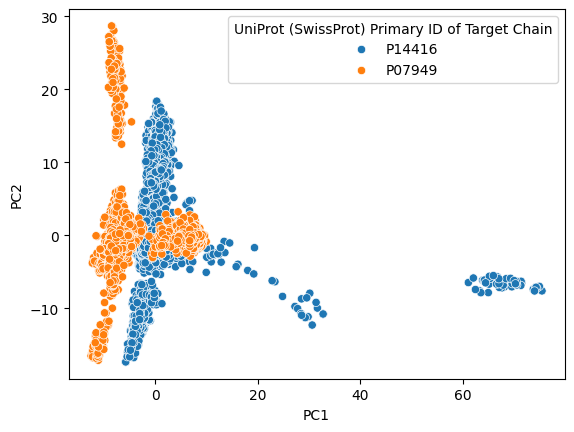

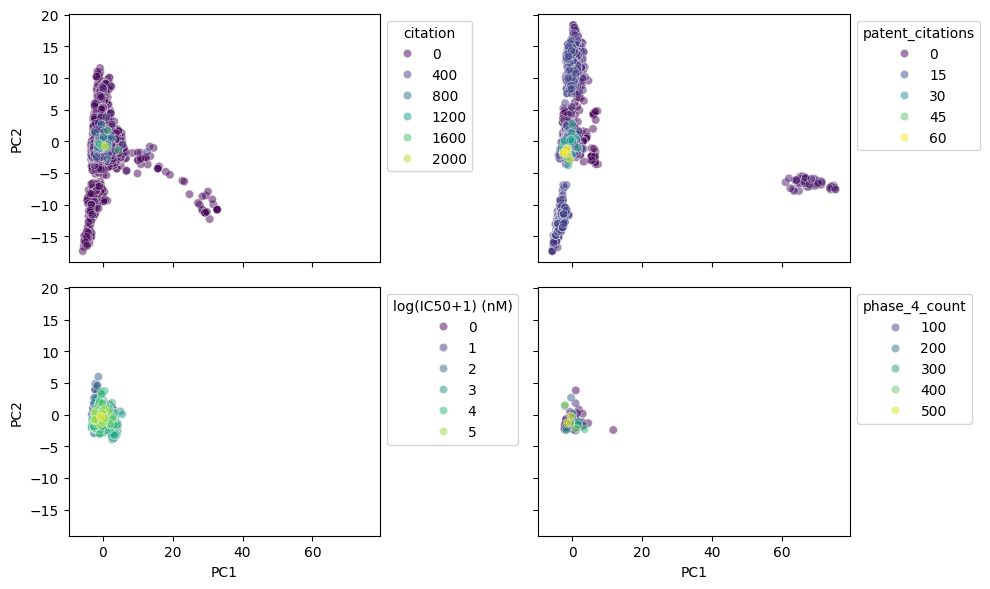

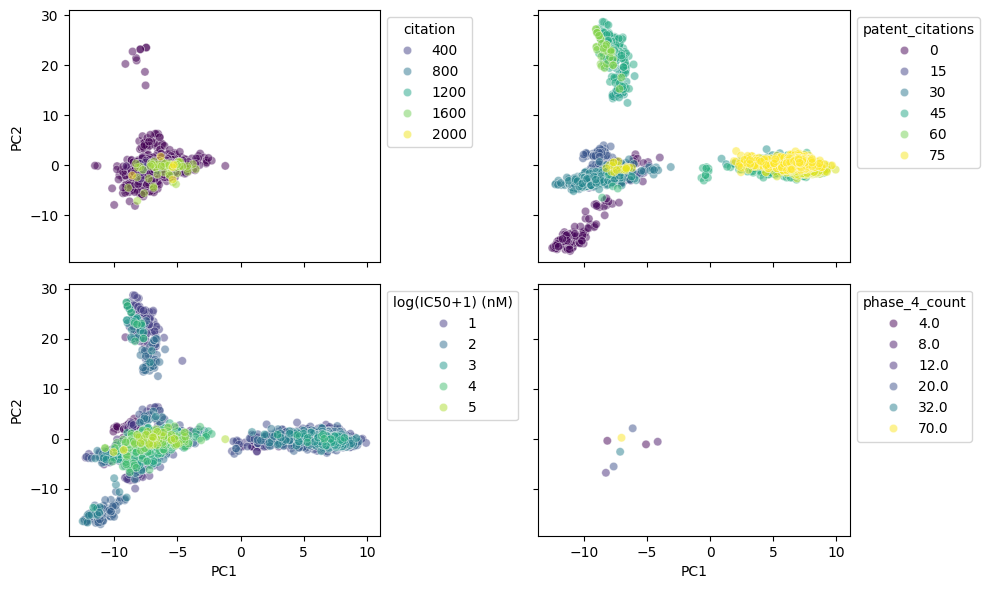

In [21]:
# examples:
import seaborn as sns
from matplotlib import pyplot as plt

# pcas of each target
sns.scatterplot(
    result, x="PC1", y="PC2", hue="UniProt (SwissProt) Primary ID of Target Chain"
)
plt.show()

# seperating each pca and overlaying stuff
# TODO: plotly
for target in targets["UniProt (SwissProt) Primary ID of Target Chain"].unique():
    fig, axs = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(10, 6))
    for ax, hue in zip(
        axs.flatten(),
        ["citation", "patent_citations", "log(IC50+1) (nM)", "phase_4_count"],
    ):
        sns.scatterplot(
            result[
                result["UniProt (SwissProt) Primary ID of Target Chain"] == target
            ].sort_values(hue),
            x="PC1",
            y="PC2",
            hue=hue,
            ax=ax,
            palette="viridis",
            alpha=0.5,
        )
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

In [22]:
uniprot_ids_names_mapping

{'P07949': 'RET', 'P14416': 'D(2) dopamine receptor'}

In [23]:
import plotly.graph_objects as go
from src.scripts.save_plotly import save_plotly

for target in targets["UniProt (SwissProt) Primary ID of Target Chain"].unique():
    result_ = result[result["UniProt (SwissProt) Primary ID of Target Chain"] == target]

    # Compute the global x and y ranges based on the full dataset
    x_range = [1.1 * result_["PC1"].min(), 1.1 * result_["PC1"].max()]
    y_range = [1.1 * result_["PC2"].min(), 1.1 * result_["PC2"].max()]

    # Create a base figure
    fig = go.Figure()

    # List of hue variables
    hue_variables = [
        "citation",
        "patent_citations",
        "log(IC50+1) (nM)",
        "phase_4_count",
    ]
    title = f"{uniprot_ids_names_mapping[target]} Ligand Fingerprint PC1 vs PC2"

    # Loop through each hue variable, filter out NaN values, and add as a separate trace
    for hue in hue_variables:
        filtered_data = result_.dropna(subset=[hue]).sort_values(
            hue
        )  # Drop rows where hue has NaN
        fig.add_trace(
            go.Scatter(
                x=filtered_data["PC1"],
                y=filtered_data["PC2"],
                mode="markers",
                marker=dict(
                    size=8,
                    color=filtered_data[hue],
                    colorscale="Viridis",
                    showscale=True,
                    # opacity=0.5,
                    colorbar=dict(
                        title=hue.capitalize().replace("_", " ")
                    ),  # Custom colorbar title
                ),
                name=hue,  # Name will be used in the dropdown menu
                visible=False,  # Initially hidden; we will toggle visibility
                # hoverinfo=hue,
            )
        )

    # Set the first trace to be visible initially
    fig.data[0].visible = True

    # Create dropdown menu
    dropdown_buttons = [
        dict(
            label=hue.capitalize().replace("_", " "),
            method="update",
            args=[
                {
                    "visible": [i == idx for i in range(len(hue_variables))]
                },  # Toggle visibility
                {
                    "title": f"{title} with {hue.capitalize().replace('_', ' ')} overlayed"
                },  # Update title dynamically
            ],
        )
        for idx, hue in enumerate(hue_variables)
    ]

    # Add dropdown menu and set consistent x and y ranges in layout
    fig.update_layout(
        updatemenus=[
            dict(
                buttons=dropdown_buttons,
                direction="down",
                showactive=True,
                # x=0.1,  # Position of the dropdown menu
                # y=1.15,
            )
        ],
        title={
            "text": title,
            "x": 0.5,
            "xanchor": "center",
            "yanchor": "top",
        },
        xaxis=dict(title="PC1", range=x_range),  # Fixed x-axis range
        yaxis=dict(title="PC2", range=y_range),  # Fixed y-axis range
        template="plotly_dark",
    )

    save_plotly(
        fig,
        f"../frontend/figures/{uniprot_ids_names_mapping[target].replace(' ', '_')}_2D_PCA_overlays",
    )

    # Show the figure
    fig.show()

In [24]:
result

Ligand SMILES  IC50 (nM)  \
0           COc1ccc2C[C@@H]3N(C)CCc4cc5OCOc5c(c34)-c2c1O        NaN   
1                      Cl.CN1CCN2C(C1)c1ccccc1Cc1ccccc21        NaN   
2                     CN1CCN2[C@H](C1)c1ccccc1Cc1ccccc21        NaN   
3                              CN[C@@H](C)Cc1ccc2OCOc2c1        NaN   
4                     Clc1ccc2Oc3ccccc3N=C(N3CCNCC3)c2c1        NaN   
...                                                  ...        ...   
14909  COc1cc2nccc(Oc3ccc(Nc4nn(C)cc4C(=O)NC45CC6CC(C...      136.0   
14910  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...       11.0   
14911  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...       12.0   
14912  OCc1cc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(F...       30.0   
14913  Nc1nccc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(...       30.0   

                                             Institution  \
0                           Neuroscience Research Centre   
1      Johnson & Johnson Pharmaceutical Research & De...   
2                      Oregon Health Sciences University   
3                                      SRI International   
4                                  University of Toronto   
...                                                  ...   
14909                                                NaN   
14910                                                NaN   
14911                                                NaN   
14912                                                NaN   
14913                                                NaN   

      DrugBank ID of Ligand ZINC ID of Ligand  \
0                       NaN      ZINC00000103   
1                       NaN      ZINC00000504   
2                       NaN      ZINC00000855   
3                       NaN      ZINC00000859   
4                   DB00543      ZINC00000931   
...                     ...               ...   
14909                   NaN               NaN   
14910                   NaN               NaN   
14911                   NaN               NaN   
14912                   NaN               NaN   
14913                   NaN               NaN   

      UniProt (SwissProt) Primary ID of Target Chain                      doi  \
0                                             P14416                      NaN   
1                                             P14416        10.1021/jm049632c   
2                                             P14416  10.1073/pnas.86.24.9762   
3                                             P14416                      NaN   
4                                             P14416    10.1038/sj.mp.4000336   
...                                              ...                      ...   
14909                                         P07949                      NaN   
14910                                         P07949                      NaN   
14911                                         P07949                      NaN   
14912                                         P07949                      NaN   
14913                                         P07949                      NaN   

       citation patent patent_status  patent_citations  phase_4_count  \
0           NaN    NaN           NaN               NaN            NaN   
1          64.0    NaN           NaN               NaN           40.0   
2         316.0    NaN           NaN               NaN            NaN   
3           NaN    NaN           NaN               NaN            NaN   
4         215.0    NaN           NaN               NaN            NaN   
...         ...    ...           ...               ...            ...   
14909       NaN    NaN           NaN               NaN            NaN   
14910       NaN    NaN           NaN               NaN            NaN   
14911       NaN    NaN           NaN               NaN            NaN   
14912       NaN    NaN           NaN               NaN            NaN   
14913       NaN    NaN           NaN               NaN            NaN   

       log(IC50+1) (nM)       

In [25]:
result_ = result[result["UniProt (SwissProt) Primary ID of Target Chain"] == "P14416"]

In [26]:
result_

Ligand SMILES  IC50 (nM)  \
0           COc1ccc2C[C@@H]3N(C)CCc4cc5OCOc5c(c34)-c2c1O        NaN   
1                      Cl.CN1CCN2C(C1)c1ccccc1Cc1ccccc21        NaN   
2                     CN1CCN2[C@H](C1)c1ccccc1Cc1ccccc21        NaN   
3                              CN[C@@H](C)Cc1ccc2OCOc2c1        NaN   
4                     Clc1ccc2Oc3ccccc3N=C(N3CCNCC3)c2c1        NaN   
...                                                  ...        ...   
10405  CCCN(CCc1cc(O)c(CCN(CCC)[C@H]2CCc3nc(N)sc3C2)c...        NaN   
10406  CCCN(CCc1ccc(CCN(CCC)[C@H]2CCc3c(O)cccc3C2)cc1...        NaN   
10407  Fc1ccc(CN2CCCC22CCN(Cc3cc4ccc(Cl)cc4[nH]3)C2)cc1F        NaN   
10408  Fc1ccc(CN2CCCC3(CCN(Cc4cc5ccc(Cl)cc5[nH]4)C3)C...        NaN   
10409          Cc1cc(nc(Nc2ccccc2-c2nnn[nH]2)n1)C(F)(F)F        NaN   

                                             Institution  \
0                           Neuroscience Research Centre   
1      Johnson & Johnson Pharmaceutical Research & De...   
2                      Oregon Health Sciences University   
3                                      SRI International   
4                                  University of Toronto   
...                                                  ...   
10405                                                NaN   
10406                                                NaN   
10407                                                NaN   
10408                                                NaN   
10409                                                NaN   

      DrugBank ID of Ligand ZINC ID of Ligand  \
0                       NaN      ZINC00000103   
1                       NaN      ZINC00000504   
2                       NaN      ZINC00000855   
3                       NaN      ZINC00000859   
4                   DB00543      ZINC00000931   
...                     ...               ...   
10405                   NaN               NaN   
10406                   NaN               NaN   
10407                   NaN               NaN   
10408                   NaN               NaN   
10409                   NaN               NaN   

      UniProt (SwissProt) Primary ID of Target Chain                      doi  \
0                                             P14416                      NaN   
1                                             P14416        10.1021/jm049632c   
2                                             P14416  10.1073/pnas.86.24.9762   
3                                             P14416                      NaN   
4                                             P14416    10.1038/sj.mp.4000336   
...                                              ...                      ...   
10405                                         P14416                      NaN   
10406                                         P14416                      NaN   
10407                                         P14416                      NaN   
10408                                         P14416                      NaN   
10409                                         P14416                      NaN   

       citation patent patent_status  patent_citations  phase_4_count  \
0           NaN    NaN           NaN               NaN            NaN   
1          64.0    NaN           NaN               NaN           40.0   
2         316.0    NaN           NaN               NaN            NaN   
3           NaN    NaN           NaN               NaN            NaN   
4         215.0    NaN           NaN               NaN            NaN   
...         ...    ...           ...               ...            ...   
10405       NaN    NaN           NaN               NaN            NaN   
10406       NaN    NaN           NaN               NaN            NaN   
10407       NaN    NaN           NaN               NaN            NaN   
10408       NaN    NaN           NaN               NaN            NaN   
10409       NaN    NaN           NaN               NaN            NaN   

       log(IC50+1) (nM)       

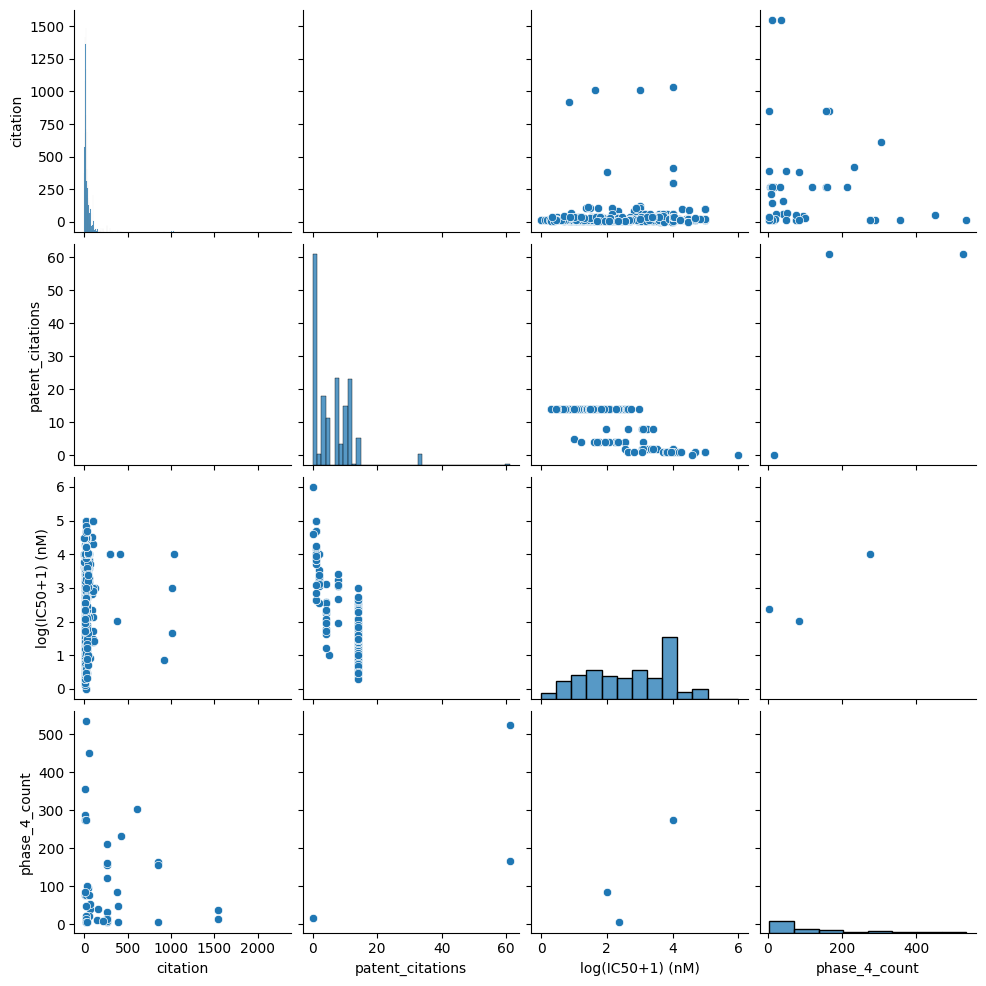

In [27]:
sns.pairplot(
    result_[["citation", "patent_citations", "log(IC50+1) (nM)", "phase_4_count"]]
)

# Clustering

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
def kmeans_selection(data, range):
    scores = []
    for k in range:
        kmeans = KMeans(n_clusters=k, random_state=10).fit(data[["PC1", "PC2", "PC3"]])
        labels = kmeans.predict(data[["PC1", "PC2", "PC3"]])
        score = silhouette_score(data[["PC1", "PC2", "PC3"]], labels)
        scores.append({"k": k, "silhouette_score": score, "sse": kmeans.inertia_})
    return scores


result = result[result["UniProt (SwissProt) Primary ID of Target Chain"] == "P07949"]
kmeans_selection_df = pd.DataFrame(
    kmeans_selection(result[["PC1", "PC2", "PC3"]], range(2, 10))
)
kmeans_selection_df

k  silhouette_score            sse
0  2          0.602919  272061.179623
1  3          0.595255  200424.470583
2  4          0.663924   99709.562590
3  5          0.697389   39686.620401
4  6          0.646908   33682.835359
5  7          0.653307   26488.775621
6  8          0.501417   27016.640628
7  9          0.515360   19838.310281

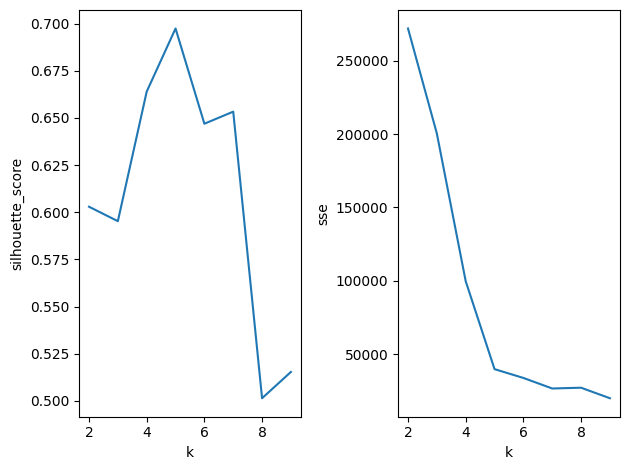

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.lineplot(kmeans_selection_df, x="k", y="silhouette_score", ax=ax1)
sns.lineplot(kmeans_selection_df, x="k", y="sse", ax=ax2)
plt.tight_layout()
plt.show()

In [39]:
kmeans = KMeans(n_clusters=5, random_state=10).fit(result[["PC1", "PC2", "PC3"]])
result["cluster"] = kmeans.predict(result[["PC1", "PC2", "PC3"]]).astype(str)
result

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_4267/650739328.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ligand SMILES  IC50 (nM)  \
10410               COc1cc2ncnc(Nc3cc(O)c(C)cc3F)c2cc1OC       0.75   
10411             Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1        NaN   
10412                   COc1cc2ncnc(Nc3ccc(O)cc3)c2cc1OC     720.00   
10413               O=C1Nc2ccccc2\C1=C\c1ccc(s1)-c1cccs1    9400.00   
10414                      COc1cc2ncnc(Nc3ccccc3)c2cc1OC    1700.00   
...                                                  ...        ...   
14909  COc1cc2nccc(Oc3ccc(Nc4nn(C)cc4C(=O)NC45CC6CC(C...     136.00   
14910  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...      11.00   
14911  Cn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Nc2ccc(Oc3c...      12.00   
14912  OCc1cc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(F...      30.00   
14913  Nc1nccc(Oc2ccc3c(cccc3c2)C(=O)Nc2cccc(c2)C(F)(...      30.00   

                                   Institution DrugBank ID of Ligand  \
10410                 University of Manchester                   NaN   
10411                        Ambit Biosciences               DB04879   
10412                 University of Manchester                   NaN   
10413  Universit&#163; di Napoli "Federico II"                   NaN   
10414                 University of Manchester                   NaN   
...                                        ...                   ...   
14909                                      NaN                   NaN   
14910                                      NaN                   NaN   
14911                                      NaN                   NaN   
14912                                      NaN                   NaN   
14913                                      NaN                   NaN   

      ZINC ID of Ligand UniProt (SwissProt) Primary ID of Target Chain  \
10410      ZINC00006952                                         P07949   
10411      ZINC00007460                                         P07949   
10412      ZINC00009851                                         P07949   
10413      ZINC00110550                                         P07949   
10414      ZINC00116934                                         P07949   
...                 ...                                            ...   
14909               NaN                                         P07949   
14910               NaN                                         P07949   
14911               NaN                                         P07949   
14912               NaN                                         P07949   
14913               NaN                                         P07949   

                                doi  citation patent patent_status  \
10410  10.1016/j.ejmech.2016.01.039      33.0    NaN           NaN   
10411                           NaN       NaN    NaN           NaN   
10412  10.1016/j.ejmech.2016.01.039      33.0    NaN           NaN   
10413  10.1016/j.ejmech.2018.02.080      14.0    NaN           NaN   
10414    10.1016/j.bmcl.2016.03.100       8.0    NaN           NaN   
...                             ...       ...    ...           ...   
14909                           NaN       NaN    NaN           NaN   
14910                           NaN       NaN    NaN           NaN   
14911                           NaN       NaN    NaN           NaN   
14912                           NaN       NaN    NaN           NaN   
14913                           NaN       NaN    NaN           NaN   

       patent_citations  phase_4_count  log(IC50+1) (nM)  \
10410               NaN            NaN          0.243038   
10411               NaN            NaN               NaN   
10412               NaN            NaN          2.857935   
10413               NaN            NaN          3.973174   
10414               NaN            NaN          3.230704   
...                 ...            ...               ...   
14909               NaN            NaN          2.136721   
14910               NaN            NaN          1.079181   
14911               NaN            NaN          1.11394

In [47]:
kmeans.cluster_centers_

array([[ -8.78040416,  -2.10134863,  -7.27590604],
       [ -6.78377934,  -1.06490157,   1.84463687],
       [  6.74122508,  -0.17968944,   0.03888562],
       [ -7.7329722 ,  21.56056222,   6.08848269],
       [-10.92457794, -14.62591889,  24.04607136]])

In [152]:
import plotly.express as px
import plotly.graph_objects as go

# Scatter plot for the points
fig = px.scatter_3d(
    result.sort_values("cluster"),
    x="PC1",
    y="PC2",
    z="PC3",
    color="cluster",
    template="plotly_dark",
    opacity=0.5,
)

# Update marker size for the main plot
fig.update_traces(marker=dict(size=2))

# Add centroids to the figure
centroids = kmeans.cluster_centers_
fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],  # Assuming PC1, PC2, and PC3 are the first 3 components
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode="markers",
        marker=dict(
            size=3,
            color="white",  # Change this to your desired color
            symbol="x",  # Change this to your desired symbol (e.g., 'diamond', 'cross', etc.)
        ),
        name="Centroids",
        opacity=0.5,
    )
)

# Update layout
fig.update_layout(
    title={
        "text": "PCA K-Means Clustering on RET Ligands",
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    },
    scene=dict(
        aspectmode="cube",  # Ensures fixed proportions for the axes
    ),
)

# Show the plot
save_plotly(fig, "../frontend/figures/data_story/kmeans_RET")

# Show the plot
fig.show()

In [97]:
result.groupby("cluster").aggregate(
    {"log(IC50+1) (nM)": "mean", "IC50 (nM)": "mean"}
).sort_values("log(IC50+1) (nM)")

log(IC50+1) (nM)    IC50 (nM)
cluster                               
0                1.099615   455.438113
2                1.480619    86.344882
3                1.553758   348.541143
4                1.859976   120.932292
1                2.507055  8084.718272

<Axes: ylabel='log(IC50+1) (nM)'>

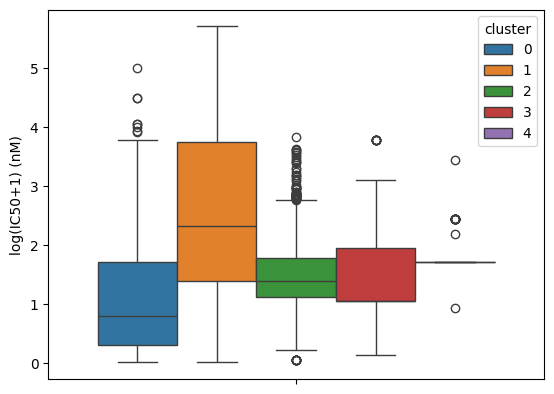

In [107]:
sns.boxplot(result.sort_values("log(IC50+1) (nM)"), hue="cluster", y="log(IC50+1) (nM)")

In [151]:
import plotly.express as px
from src.scripts.save_plotly import save_plotly

# Create the boxplot with Plotly Express
fig = px.box(
    result.sort_values("log(IC50+1) (nM)"),
    y="log(IC50+1) (nM)",
    color="cluster",
    template="plotly_dark",
    category_orders={"cluster": sorted(result["cluster"].unique())},
)

# Update layout
fig.update_layout(
    title={
        "text": "Distribution of log(IC50+1) for each RET ligand cluster",
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    },
)

# Show the plot
save_plotly(fig, "../frontend/figures/data_story/boxplot_RET_ligand_cluster")
fig.show()

In [122]:
representatives = []

for cluster in result["cluster"].unique():
    cluster_results = result.query(f"cluster == '{cluster}'").dropna(
        subset=["log(IC50+1) (nM)"]
    )
    cluster_results = cluster_results.sort_values("log(IC50+1) (nM)")
    representatives.append(cluster_results.iloc[len(cluster_results) // 2])
representatives = pd.DataFrame(representatives).sort_values("log(IC50+1) (nM)")

representatives

Ligand SMILES  IC50 (nM)  \
13356  CC(C)(C)n1nc(C(=O)Nc2cc([nH]n2)-c2ccco2)c2c(N)...       5.13   
13248  Cc1cc(Nc2cc(C)cc(n2)N2CCC(C)(CC2)C(=O)NCc2ccc(...      10.00   
10966  CO[C@@H]1CCN(C1)C(=O)N1CCN(CC1)c1ccc(cn1)-c1cc...      23.10   
14022  CC1(C)CCN(CCCOc2cc3nccc(Oc4ccc(NC(=O)Nc5ccc(Cl...      50.00   
10555                COc1cc2ncnc(N(C)c3cccc(O)c3)c2cc1OC     210.00   

                                      Institution  DrugBank ID of Ligand  \
13356               Taiho Pharmaceutical Co., Ltd                    NaN   
13248             BLUEPRINT MEDICINES CORPORATION                    NaN   
10966                         Array BioPharma Inc                    NaN   
14022  BEIJING SCITECH-MQ PHARMACEUTICALS LIMITED                    NaN   
10555                    University of Manchester                    NaN   

      ZINC ID of Ligand UniProt (SwissProt) Primary ID of Target Chain  \
13356               NaN                                         P07949   
13248               NaN                                         P07949   
10966               NaN                                         P07949   
14022               NaN                                         P07949   
10555      ZINC28388875                                         P07949   

                                doi  citation      patent patent_status  \
13356                           NaN       NaN  US10233189        Active   
13248                           NaN       NaN  US10227329        Active   
10966                           NaN       NaN  US10023570        Active   
14022                           NaN       NaN  US11479559        Active   
10555  10.1016/j.ejmech.2016.01.039      33.0         NaN           NaN   

       patent_citations  phase_4_count  log(IC50+1) (nM)  \
13356              20.0            NaN          0.787460   
13248              46.0            NaN          1.041393   
10966              76.0            NaN          1.382017   
14022               1.0            NaN          1.707570   
10555               NaN            NaN          2.324282   

                                      Ligand Fingerprint        PC1  \
13356  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  -9.046678   
13248  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  -7.414813   
10966  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   8.317336   
14022  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ... -11.857420   
10555  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  -6.037457   

             PC2        PC3 cluster  
13356  -0.398254  -5.655125       0  
13248  21.811657   5.552851       3  
10966  -0.050297  -1.546490       2  
14022 -15.978447  26.539688       4  
10555  -1.864602   0.754167       1

In [132]:
from src.scripts.smiles import draw3D

draw3D(representatives.iloc[0]["Ligand SMILES"], display=True)
print(representatives.iloc[0])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Ligand SMILES                                     CC(C)(C)n1nc(C(=O)Nc2cc([nH]n2)-c2ccco2)c2c(N)...
IC50 (nM)                                                                                      5.13
Institution                                                           Taiho Pharmaceutical Co., Ltd
DrugBank ID of Ligand                                                                           NaN
ZINC ID of Ligand                                                                               NaN
UniProt (SwissProt) Primary ID of Target Chain                                               P07949
doi                                                                                             NaN
citation                                                                                        NaN
patent                                                                                   US10233189
patent_status                                                                                Active


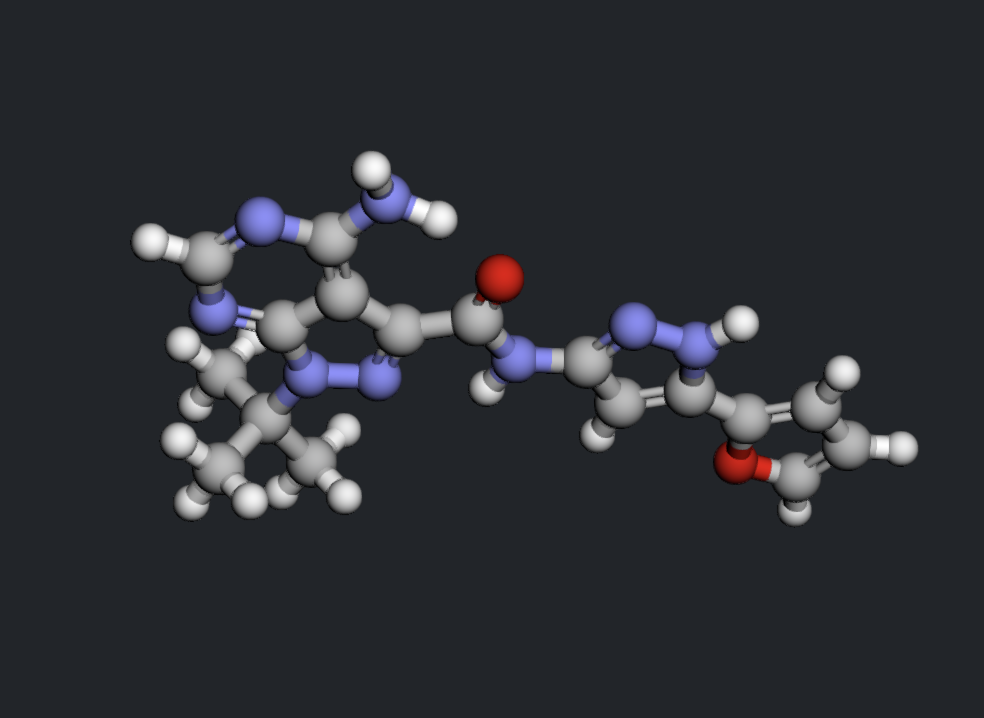

In [133]:
draw3D(representatives.iloc[1]["Ligand SMILES"], display=True)
print(representatives.iloc[1])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Ligand SMILES                                     Cc1cc(Nc2cc(C)cc(n2)N2CCC(C)(CC2)C(=O)NCc2ccc(...
IC50 (nM)                                                                                      10.0
Institution                                                         BLUEPRINT MEDICINES CORPORATION
DrugBank ID of Ligand                                                                           NaN
ZINC ID of Ligand                                                                               NaN
UniProt (SwissProt) Primary ID of Target Chain                                               P07949
doi                                                                                             NaN
citation                                                                                        NaN
patent                                                                                   US10227329
patent_status                                                                                Active


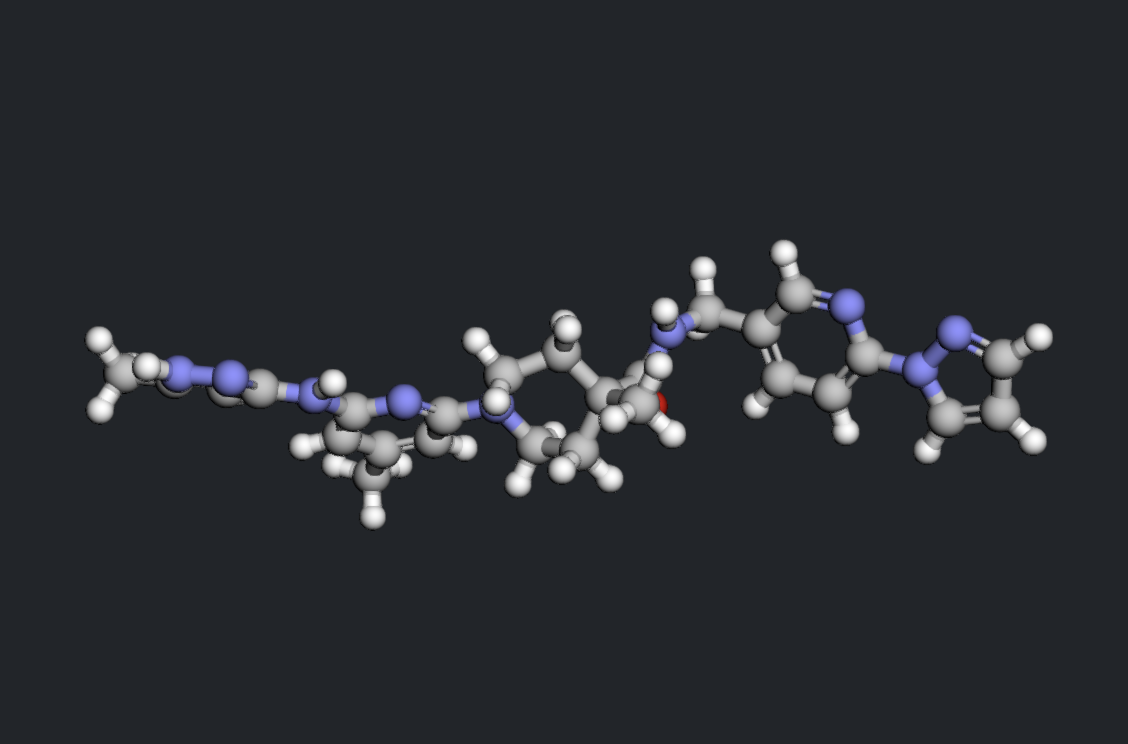

In [134]:
draw3D(representatives.iloc[2]["Ligand SMILES"], display=True)
print(representatives.iloc[2])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Ligand SMILES                                     CO[C@@H]1CCN(C1)C(=O)N1CCN(CC1)c1ccc(cn1)-c1cc...
IC50 (nM)                                                                                      23.1
Institution                                                                     Array BioPharma Inc
DrugBank ID of Ligand                                                                           NaN
ZINC ID of Ligand                                                                               NaN
UniProt (SwissProt) Primary ID of Target Chain                                               P07949
doi                                                                                             NaN
citation                                                                                        NaN
patent                                                                                   US10023570
patent_status                                                                                Active


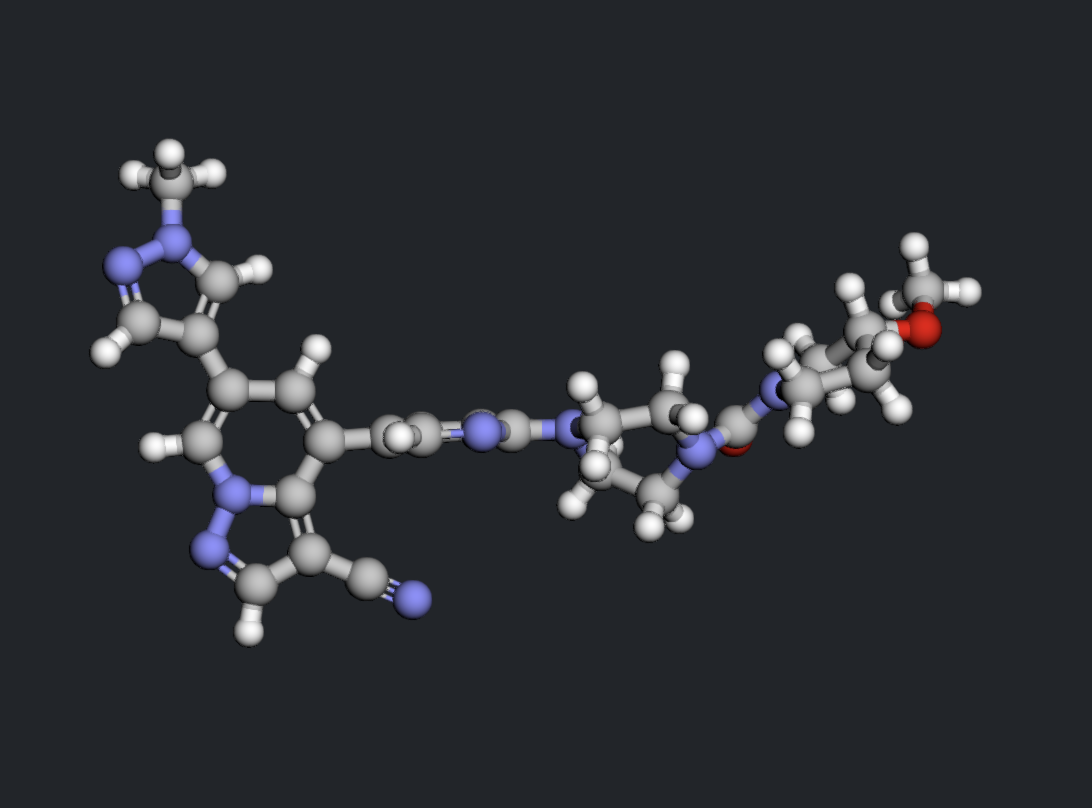

In [135]:
draw3D(representatives.iloc[3]["Ligand SMILES"], display=True)
print(representatives.iloc[3])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Ligand SMILES                                     CC1(C)CCN(CCCOc2cc3nccc(Oc4ccc(NC(=O)Nc5ccc(Cl...
IC50 (nM)                                                                                      50.0
Institution                                              BEIJING SCITECH-MQ PHARMACEUTICALS LIMITED
DrugBank ID of Ligand                                                                           NaN
ZINC ID of Ligand                                                                               NaN
UniProt (SwissProt) Primary ID of Target Chain                                               P07949
doi                                                                                             NaN
citation                                                                                        NaN
patent                                                                                   US11479559
patent_status                                                                                Active


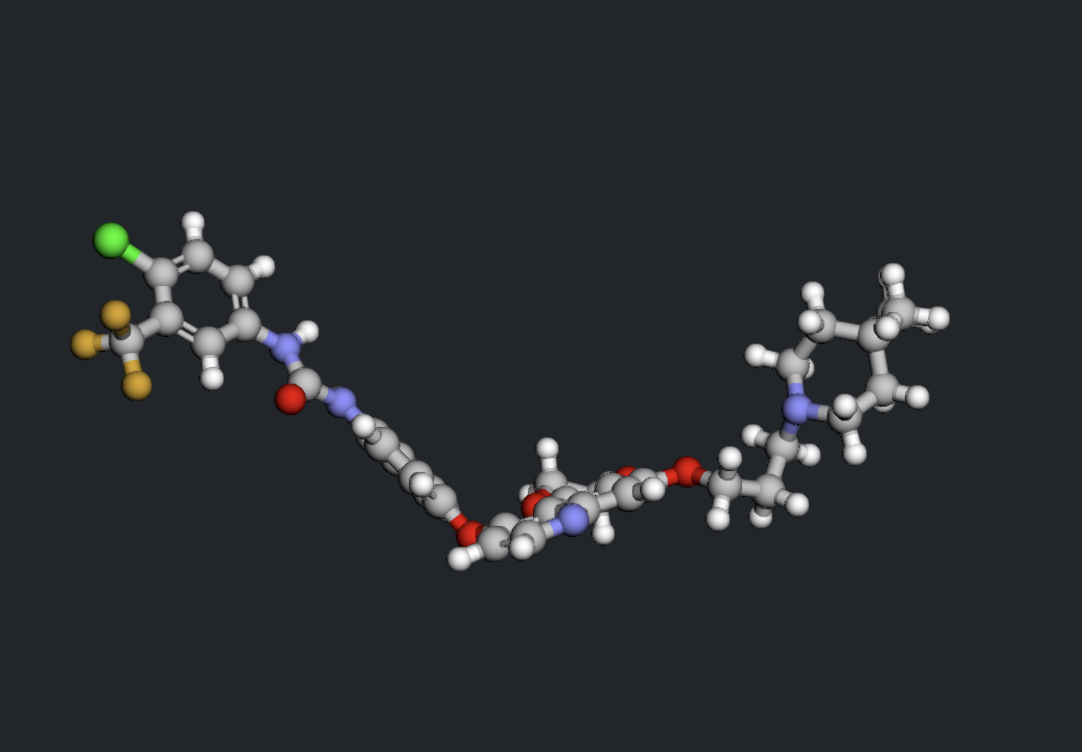

In [137]:
draw3D(representatives.iloc[4]["Ligand SMILES"], display=True)
print(representatives.iloc[4])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Ligand SMILES                                                   COc1cc2ncnc(N(C)c3cccc(O)c3)c2cc1OC
IC50 (nM)                                                                                     210.0
Institution                                                                University of Manchester
DrugBank ID of Ligand                                                                           NaN
ZINC ID of Ligand                                                                      ZINC28388875
UniProt (SwissProt) Primary ID of Target Chain                                               P07949
doi                                                                    10.1016/j.ejmech.2016.01.039
citation                                                                                       33.0
patent                                                                                          NaN
patent_status                                                                                   NaN


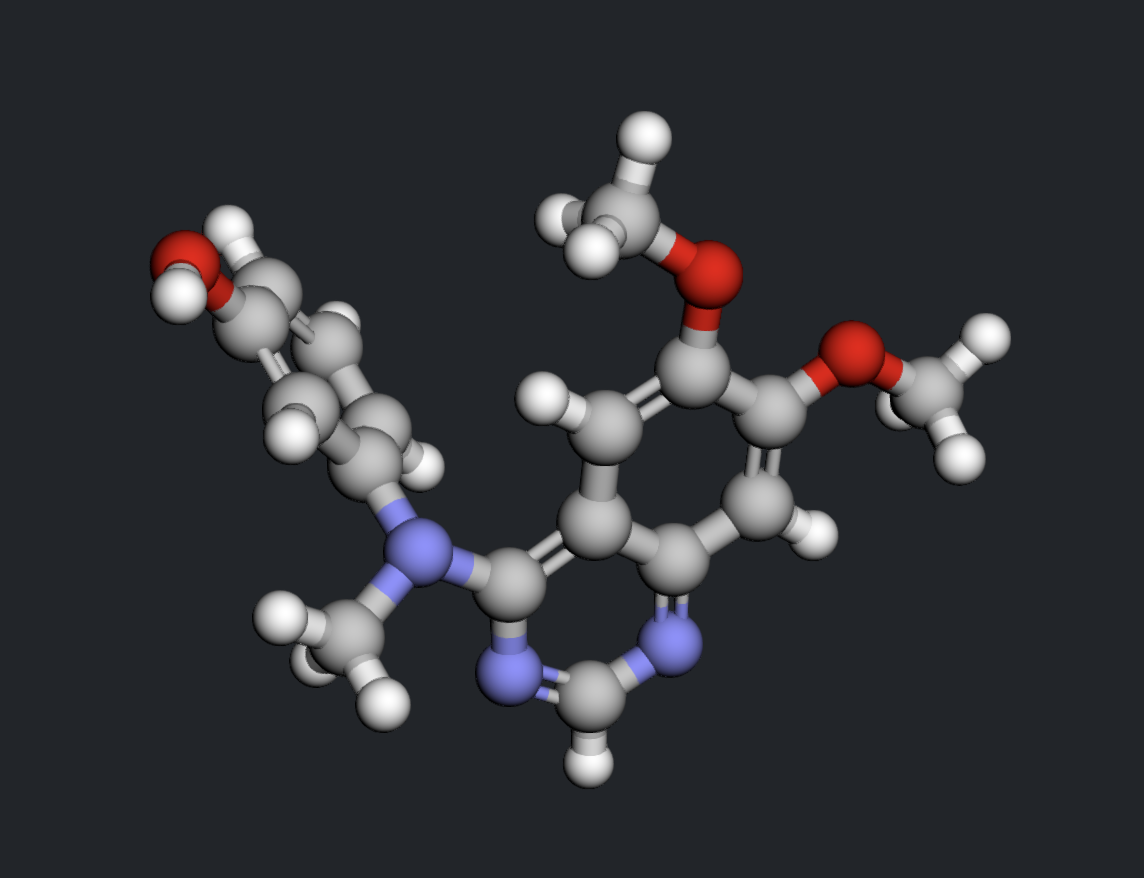

In [138]:
representatives

Ligand SMILES  IC50 (nM)  \
13356  CC(C)(C)n1nc(C(=O)Nc2cc([nH]n2)-c2ccco2)c2c(N)...       5.13   
13248  Cc1cc(Nc2cc(C)cc(n2)N2CCC(C)(CC2)C(=O)NCc2ccc(...      10.00   
10966  CO[C@@H]1CCN(C1)C(=O)N1CCN(CC1)c1ccc(cn1)-c1cc...      23.10   
14022  CC1(C)CCN(CCCOc2cc3nccc(Oc4ccc(NC(=O)Nc5ccc(Cl...      50.00   
10555                COc1cc2ncnc(N(C)c3cccc(O)c3)c2cc1OC     210.00   

                                      Institution  DrugBank ID of Ligand  \
13356               Taiho Pharmaceutical Co., Ltd                    NaN   
13248             BLUEPRINT MEDICINES CORPORATION                    NaN   
10966                         Array BioPharma Inc                    NaN   
14022  BEIJING SCITECH-MQ PHARMACEUTICALS LIMITED                    NaN   
10555                    University of Manchester                    NaN   

      ZINC ID of Ligand UniProt (SwissProt) Primary ID of Target Chain  \
13356               NaN                                         P07949   
13248               NaN                                         P07949   
10966               NaN                                         P07949   
14022               NaN                                         P07949   
10555      ZINC28388875                                         P07949   

                                doi  citation      patent patent_status  \
13356                           NaN       NaN  US10233189        Active   
13248                           NaN       NaN  US10227329        Active   
10966                           NaN       NaN  US10023570        Active   
14022                           NaN       NaN  US11479559        Active   
10555  10.1016/j.ejmech.2016.01.039      33.0         NaN           NaN   

       patent_citations  phase_4_count  log(IC50+1) (nM)  \
13356              20.0            NaN          0.787460   
13248              46.0            NaN          1.041393   
10966              76.0            NaN          1.382017   
14022               1.0            NaN          1.707570   
10555               NaN            NaN          2.324282   

                                      Ligand Fingerprint        PC1  \
13356  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  -9.046678   
13248  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  -7.414813   
10966  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   8.317336   
14022  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ... -11.857420   
10555  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  -6.037457   

             PC2        PC3 cluster  
13356  -0.398254  -5.655125       0  
13248  21.811657   5.552851       3  
10966  -0.050297  -1.546490       2  
14022 -15.978447  26.539688       4  
10555  -1.864602   0.754167       1

In [140]:
from src.scripts import smiles
from tqdm.notebook import tqdm

tqdm.pandas()

descriptors = representatives["Ligand SMILES"].progress_apply(smiles.get_MolDescriptors)
isdict = lambda x: isinstance(x, dict)
descriptors_df = pd.DataFrame(
    descriptors[descriptors.apply(isdict)].to_list(),
    index=descriptors[descriptors.apply(isdict)].index,
)

  0%|          | 0/5 [00:00<?, ?it/s]

In [153]:
representatives_with_descriptors = pd.concat([representatives, descriptors_df], axis=1)
representatives_with_descriptors

Ligand SMILES  IC50 (nM)  \
13356  CC(C)(C)n1nc(C(=O)Nc2cc([nH]n2)-c2ccco2)c2c(N)...       5.13   
13248  Cc1cc(Nc2cc(C)cc(n2)N2CCC(C)(CC2)C(=O)NCc2ccc(...      10.00   
10966  CO[C@@H]1CCN(C1)C(=O)N1CCN(CC1)c1ccc(cn1)-c1cc...      23.10   
14022  CC1(C)CCN(CCCOc2cc3nccc(Oc4ccc(NC(=O)Nc5ccc(Cl...      50.00   
10555                COc1cc2ncnc(N(C)c3cccc(O)c3)c2cc1OC     210.00   

                                      Institution  DrugBank ID of Ligand  \
13356               Taiho Pharmaceutical Co., Ltd                    NaN   
13248             BLUEPRINT MEDICINES CORPORATION                    NaN   
10966                         Array BioPharma Inc                    NaN   
14022  BEIJING SCITECH-MQ PHARMACEUTICALS LIMITED                    NaN   
10555                    University of Manchester                    NaN   

      ZINC ID of Ligand UniProt (SwissProt) Primary ID of Target Chain  \
13356               NaN                                         P07949   
13248               NaN                                         P07949   
10966               NaN                                         P07949   
14022               NaN                                         P07949   
10555      ZINC28388875                                         P07949   

                                doi  citation      patent patent_status  ...  \
13356                           NaN       NaN  US10233189        Active  ...   
13248                           NaN       NaN  US10227329        Active  ...   
10966                           NaN       NaN  US10023570        Active  ...   
14022                           NaN       NaN  US11479559        Active  ...   
10555  10.1016/j.ejmech.2016.01.039      33.0         NaN           NaN  ...   

       NumAromaticRings  NumHAcceptors  NumHDonors NumHeteroatoms  \
13356                 4              8           3             10   
13248                 4              8           3             10   
10966                 4              9           0             11   
14022                 4              7           2             13   
10555                 3              6           1              6   

       NumRadicalElectrons  NumRotatableBonds  NumSaturatedCarbocycles  \
13356                    0                  3                        0   
13248                    0                  7                        0   
10966                    0                  4                        0   
14022                    0                  9                        0   
10555                    0                  4                        0   

      NumSaturatedHeterocycles  NumSaturatedRings  NumValenceElectrons  
13356                        0                  0                  138  
13248                        1                  1                  186  
10966                        2                  2                  194  
14022                        1                  1                  254  
10555                        0                  0                  118  

[5 rows x 56 columns]